# BAIT 509 Assignment 1

__Name__: June Sun

__Student_number__: 75956961

---------
__Evaluates__: Class meetings 01-04. 

__Due__: Wednesday, March 12 at 10:00am (i.e., the start of Class Meeting 05).

__Rubrics__: The MDS rubrics provide a good guide as to what is expected of you in your responses to the assignment questions. In particular, here are the most relevant ones:

- [code rubric](https://github.com/UBC-MDS/public/blob/master/rubric/rubric_code.md), for evaluating your code.
- [reasoning rubric](https://github.com/UBC-MDS/public/blob/master/rubric/rubric_reasoning.md), for evaluating your written responses.

## Instructions (5%)

- You must use proper spelling and grammar.
- Use either R or python to complete this assignment (or both). 
- Submit your assignment through [UBC Connect](https://connect.ubc.ca/) by the deadline. 
- If you submit more than one file for your assignment, be sure to also include a README file to inform the grader of how to navigate your solutions.

## Exercise 1: $k$-NN Fundamentals (20%)


Here we will try classification of the famous handwritten digits data set. 

This data set exists in many forms; we will use the one bundled in `sklearn.datasets`. We will also use `sklearn` for classification.

Load the data:

In [865]:
from sklearn import datasets
import matplotlib.pyplot as plt
import random
%matplotlib inline

digits = datasets.load_digits()

You can check out the documentation for the data by running `print(digits['DESCR'])`. We'll extract the features and labels for you:

In [866]:
X = digits['data'] # this is the data with each 8x8 image "flattened" into a length-64 vector.
Y = digits['target'] # these are the labels (0-9).

Here's a plot of a random example:

Text(0.5,1,'This is a 4')

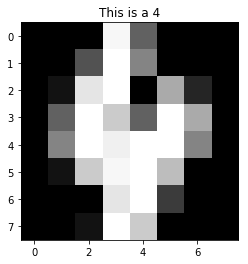

In [867]:
idx = random.randint(0, digits['images'].shape[0]-1) 
plt.imshow(digits['images'][idx], cmap='Greys_r')
plt.title('This is a %d' % digits['target'][idx])

### 1(a) Fundamentals

1. How many features are there, and what are they?

**Explaination:** There are 64 features, each of which is a grayscale value ranged from integer 0 to 16.

2. Which is closer to element 0 (`X[0]`) -- element 1 (`X[1]`) or element 2 (`X[2]`)? Report the two distances (Euclidean).

**Explanation:** From the results below, element 2 is closer to element 0.


In [868]:
# calculate the Euclidean distance
from sklearn.metrics.pairwise import euclidean_distances
d01 = euclidean_distances(X[0].reshape(1, 64), X[1].reshape(1, 64))
d02 = euclidean_distances(X[0].reshape(1, 64), X[2].reshape(1, 64))
print("The distance between X[0] and X[1] is: {}.".format(d01[0][0]))
print("The distance between X[0] and X[2] is: {}.".format(d02[0][0]))

The distance between X[0] and X[1] is: 59.55669567731239.
The distance between X[0] and X[2] is: 54.12947441089743.


3. Using the above information, if only elements 1 and 2 are used in a $k$-NN classifier with $k=1$, what would element 0 be classified as, and why?

**Explanation:** Since $k$=1 in $k$-NN classifier, element 0 will be classified as the closest element, which is element 2 since element 0 is closer to element 2 than element 1 given the information above. 

### 1(b) Investigating error

You'll be using the scikit-learn implementation of the $k$-NN classifier. Documentation is available at http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html.

Using `k=10`, fit a $k$-NN classifier using `X` and `Y` using all of the data as your training data. Obtain predictions from `X`. 

1. What proportion of these predictions are incorrect? This is called the _error rate_.    


**Explanation:** The error rate is 0.0145 according to the calculation below.

In [869]:
# train the k-NN model
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [870]:
preds = neigh.predict(X)

In [871]:
# calculate the prediction error, whether the preds match the true labels
count = 0
for i, j in zip(preds, Y):
    if i != j:
        count += 1
print("The error rate is: {}".format(count/len(preds)))

The error rate is: 0.014468558708959377


2. Choose one case that was not predicted correctly. What was predicted, and what is the correct label? Plot the image, and comment on why you think the classifier made a mistake.

**Explanation:** The case I choose is case 5 which is labeled as 5 but predicted as 9. The misrecognition of the classifier might due to the similarity of 5 and 9, since they only differs in one short line. When the top horizontal lines of 5 is too close to the next horizontal line and has a short length, it has higher possibility that the classifier will misrecognize it as 9 as the distinctive line become unclear to recognize. 

Text(0.5,1,'This is a 5, the prediction is 9')

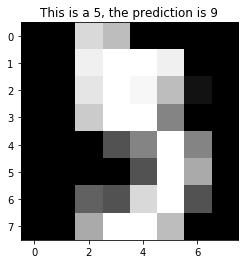

In [872]:
plt.imshow(digits['images'][5], cmap='Greys_r')
plt.title('This is a %d, the prediction is %d' % (digits['target'][5], preds[5]))

### 1(c) One Nearest Neighbour error

Now fit the classifier using `k=1`, using all of your data as training data, and again obtain predictions from `X`. 

1. What proportion of these predictions are incorrect? Briefly explain why this error rate is achieved (in one or two sentences; think about how the $k$-NN algorithm works).    

**Explanation:** All of the predictions are correct and zero proportation of the predictions are incorrect. Because the test set and the training set are the same, when K = 1, the prediction model will definetly return the original lable which has 0 distance from it. 

In [873]:
neigh1 = KNeighborsClassifier(n_neighbors=1)
neigh1.fit(X, Y)
preds1 = neigh1.predict(X)

In [874]:
count = 0
for i, j in zip(preds1, Y):
    if i != j:
        count += 1
print("The error rate is: {}".format(count/len(preds1)))

The error rate is: 0.0


2. With the above error rate in mind, if I give you a new handwritten digit (not in the data set), will the classifier _for sure_ predict the label correctly? Briefly explain why or why not.

**Explanation:** Given a new handwritten digit(not in the data set), the classifer will not for sure predict the lable correctly. Because a new handwritten digit is out of the training data,  the prediction model has bad generalization for predicting new data since $k$=1. The model has relatively high variance and low bias.

## Exercise 2: Investigating $k$-NN Error (15%)

This is a continuation of Exercise 1. Each part asks you to investigate some scenario.

__Note__: For this specific data set, you might not be able to overfit with $k$-NN! So don't worry if you can't find an example of overfitting.

__Attribution__: This exercise was adapted from DSCI 571.

### 2(a) The influence of k

Now, split the data into _training_ and _test_ sets. You can choose any reasonable fraction for training vs. testing (50% will do). 

__Note__: It's always a good idea to randomly shuffle the data before splitting, in case the data comes ordered in some way. (For example, if they are ordered by label, then your training set will be all the digits 0-4, and your test set all the digits 5-9, which would be bad... you might end up with 100% error!!) To shuffle your data, you can use [`numpy.random.shuffle`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.shuffle.html).

For various values of $k$, fit (a.k.a. _train_) a classifier using the training data. Use that classifier to obtain an error rate when predicting on both the training and test sets, for each $k$. How do the training error and test error change with $k$? Make a plot to show the trends, and briefly comment on the insights that this plot yields.

In [875]:
import numpy as np
idx_list = np.arange(len(X))
np.random.shuffle(idx_list)

In [876]:
# There are total 1797 cases in the dataset. By rounding up the result of 50% * 1797 to 899, I divide 899 cases to the training set.
splitted_data = np.split(len, [899])

In [877]:
training_X = X[splitted_data[0], ]
training_Y = Y[splitted_data[0]]
testing_X = X[splitted_data[1], ]
testing_Y = Y[splitted_data[1]]

In [878]:
def calc_error(preds, testing_Y):
    count = 0
    for i, j in zip(preds, testing_Y):
        if i != j:
            count += 1
    return count / len(preds)

def knn_run_on_k(training_X, training_Y, testing_X, testing_Y, k):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(training_X, training_Y)
    preds = neigh.predict(testing_X)
    # compare preds with testing_Y
    return calc_error(preds, testing_Y)

In [879]:
err_test = []
err_train = []
k_list = list(range(1, 11))
for k in range(1, 11):
    err = knn_run_on_k(training_X, training_Y, testing_X, testing_Y, k)
    err_ = knn_run_on_k(training_X, training_Y, training_X, training_Y, k)
    err_test.append(err)
    err_train.append(err_)

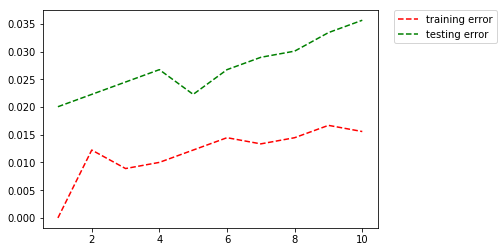

In [880]:
# plot err_list w.r.t. k_list
plt.plot(k_list, err_train,'r--', label="training error") 
plt.plot(k_list, err_test, 'g--', label="testing error")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**Explanation:** The error from testing set is always higher than that from training set when $k$ is within the range of [1, 10]. There is a trade off between bias and variance, with the increase of $k$, variance decreases while bias increases. While $k$ increases within the range of [1, 10], both errors from training set and test set increases overall.

### 2(b) The influence of data partition

rubric={reasoning:5}

Now, choose your favourite value of $k$, but vary the proportion of data reserved for the training set, again obtaining training and test error rates for each partition of the data. Plot training and test error (on the same axes) vs. the proportion of training examples. Briefly comment on the insights that this plot yields.

In [881]:
# the proportion list for splitting the dataset
proportion_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
err_train_2 = []
err_test_2 = []
for i in proportion_list:
    idx = int(len(X) * i)
    splitted_data_2 = np.split(idx_list, [idx])
    training_X_2 = X[splitted_data_2[0], ]
    training_Y_2 = Y[splitted_data_2[0]]
    testing_X_2 = X[splitted_data_2[1], ]
    testing_Y_2 = Y[splitted_data_2[1]]
    err_train_2.append(knn_run_on_k(training_X_2, training_Y_2, training_X_2, training_Y_2, k=5))
    err_test_2.append(knn_run_on_k(training_X_2, training_Y_2, testing_X_2, testing_Y_2, k=5))      

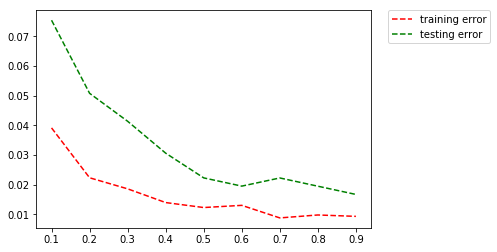

In [882]:
plt.plot(proportion_list, err_train_2,'r--', label="training error")
plt.plot(proportion_list, err_test_2, 'g--', label="testing error")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

__Explanation:__ The error from testing set is always higher than that from the training set for different proportion of data reserved for training set. With the increase of the proportion of training set, the error rate from both training set and testing set decrease, suggesting higher proportion of data reserved for training data will yeilds better results with lower error rates in both training set and testing set.

## Exercise 3: Loess (50%)

We'll use the Titanic data set to try and predict survival of passengers (`Survival`) from `Age`, `Fare`, and `Sex`, using loess. You might find it useful to log-transform `Fare`. The data have been split into a training and test set in the files `titanic_train.csv` and `titanic_test.csv` in the `data` folder. Details of the data can be found at https://www.kaggle.com/c/titanic/data.

Note: To include `Sex` in your model, simply fit a loess model to each of `"male"` and `"female"`. 

Here are ways to implement loess in python and R:

- [sklearn.neighbors.RadiusNeighborsRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsRegressor.html#sklearn.neighbors.RadiusNeighborsRegressor) in python.
- [statsmodels.nonparametric.kernel_regression.KernelReg](http://www.statsmodels.org/stable/generated/statsmodels.nonparametric.kernel_regression.KernelReg.html) in python.
- [`loess`](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/loess.html) function in R.
- [`ggplot2::geom_smooth`](http://ggplot2.tidyverse.org/reference/geom_smooth.html) for loess (and related methods) in R's `ggplot2` plotting package.

### 3(a) Scaling

Estimate the standard deviations of both (numeric) predictors. Is scaling your data justified? Does your decision also apply to $k$-NN, or is scaling only relevant for loess? If scaling is justified, proceed with scaling by subtracting the mean, then dividing by standard deviation (for each numeric predictor). 

__Hint:__ Be sure to do the same thing with the test set! Just make sure that the mean and standard deviation you use to do the scaling are of the _training_ set.

In [883]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
train_df = pd.read_csv('./data/titanic_train.csv')
test_df = pd.read_csv('./data/titanic_test.csv')

In [884]:
df_notna = train_df[train_df.Fare != 0]
df_notna = df_notna[df_notna.Age.notnull()]

In [885]:
fare_std = df_notna.Fare.std()
print('The STD of Fare is {}'.format(fare_std))
fare_scale = (df_notna["Fare"] - df_notna["Fare"].mean())/df_notna["Fare"].std()

The STD of Fare is 53.06718641665239


In [886]:
age_std = df_notna.Age.std()
print('The STD of Age is {}'.format(age_std))
age_scale = (df_notna["Age"]- df_notna["Age"].mean())/df_notna["Age"].std()

The STD of Age is 14.558871638999902


__Explanation:__

The standard variation for fare in logrithm is 53 and for age is 14.56. For better model building, I omit the rows with zero fares or NAN age following the assumption that those data are insignificant to the model. Usually, when those data with missing value are significant to the regression, there are serveral ways that we can do to replace the missing value, such as using zero or mean to replace the missing value. The significance of scaling to loess regression lies on the fact that the different measurement units of data in the sample could result in bias affected by the data with larger measurement units. 

Scaling is not only relevant to loess but to any algorithm where distance play a vital role for prediction or classification. For $k$-NN, it measures the distances between pairs of samples and these distances are also influenced by the measurement units. To avoid miss classification, we should scale the feature variables.

### 3(b) Regression

Fit a loess model to the training data for various values of the bandwidth parameter. Plot the mean squared error (MSE) on the training and test sets, and plot these across bandwidth. How does the training error curve differ from the training error curve, and why? From this plot, using the "validation set approach" for choosing hyperparameters, what bandwidth is appropriate?

In [887]:
def split_data_shuffle(X, n_splits=1, test_size=.2):
    from sklearn.model_selection import ShuffleSplit
    rs = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=0)
    train_idx, test_idx = list(rs.split(X))[0]
    return train_idx, test_idx

def split_data(X, test_size=.3):
    from sklearn.model_selection import train_test_split
    train_idx, test_idx = train_test_split(X, test_size=test_size, random_state=50)
    return train_idx, test_idx

In [888]:
# df_all_scale, df_all_scale_label = get_scaled_data(df_notna)
# df_male = df_all_scale.loc[df_notna.Sex == 'male']
# male_train_idx, male_test_idx = split_data(np.arange(len(df_male)), test_size=.3)
# df_female = df_all_scale.loc[df_notna.Sex == 'female']
# female_train_idx, female_test_idx = split_data(np.arange(len(df_female)), test_size=.3)

In [889]:
df_male = df_notna.loc[df_notna.Sex == 'male']
male_train_idx, male_test_idx = split_data(np.arange(len(df_male)), test_size=.3)
df_female = df_notna.loc[df_notna.Sex == 'female']
female_train_idx, female_test_idx = split_data(np.arange(len(df_female)), test_size=.3)

In [890]:
def get_scaled_data(X):
    y = X.Survived
    selected_X = pd.concat([X['Age'], np.log(X['Fare'])], axis=1)
    scaled_ = (selected_X - selected_X.mean()) / selected_X.std()
    return scaled_, y

In [891]:
male_scaled_df, male_scaled_label = get_scaled_data(df_male)
female_scaled_df, female_scaled_label = get_scaled_data(df_female)

In [892]:
male_scaled_df.head()

,Age,Fare
0,-0.587465,-0.954447
4,0.294683,-0.834957
6,1.583975,1.291723
7,-1.944614,0.263719
12,-0.723180,-0.834957


In [893]:
male_train, male_train_label = male_scaled_df.iloc[male_train_idx], male_scaled_label.iloc[male_train_idx]
male_test, male_test_label = male_scaled_df.iloc[male_test_idx], male_scaled_label.iloc[male_test_idx]
female_train, female_train_label = female_scaled_df.iloc[female_train_idx], female_scaled_label.iloc[female_train_idx]
female_test, female_test_label = female_scaled_df.iloc[female_test_idx], female_scaled_label.iloc[female_test_idx]

In [894]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import RadiusNeighborsRegressor
# radius list
def loess_numeric(radius_list, train_data, train_label, test_data, test_label):
    MES_train = []
    MES_test = []
    for i in radius_list:
        neigh = RadiusNeighborsRegressor(radius=i)
        neigh.fit(train_data, train_label)
        
        train_predict = neigh.predict(train_data)
        train_na = np.isnan(train_predict)
        train_predict_ = train_predict[~train_na]
        train_label_ = train_label[~train_na]
        
        test_predict = neigh.predict(test_data)
        test_na = np.isnan(test_predict)
        test_predict_ = test_predict[~test_na]
        test_label_ = test_label[~test_na]
        # calculete MES
        MES_train.append(mean_squared_error(train_label_, train_predict_))
        MES_test.append(mean_squared_error(test_label_, test_predict_))
    return MES_train, MES_test

In [895]:
radius_list_male = np.arange(0.2, 3, 0.1)
MES_train_male, MES_test_male = loess_numeric(radius_list_male, male_train, male_train_label, male_test, male_test_label)
radius_list_female = np.arange(0.2, 3, 0.1)
MES_train_female, MES_test_female = loess_numeric(radius_list_female, female_train, female_train_label, female_test, female_test_label)
                                                  

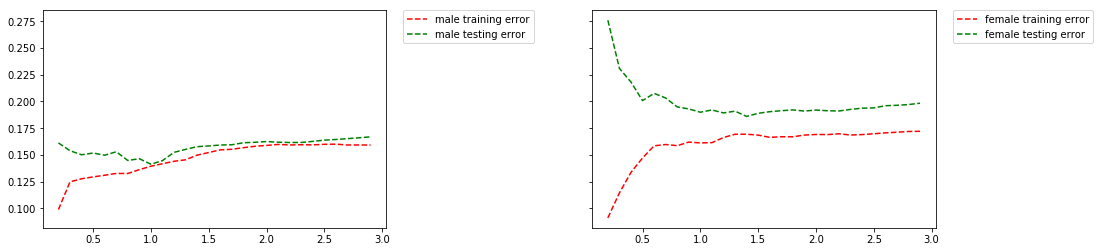

In [896]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 4), sharey=True)
ax1.plot(radius_list_male, MES_train_male, 'r--', label="male training error")
ax1.plot(radius_list_male, MES_test_male, 'g--', label="male testing error")
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.plot(radius_list_female, MES_train_female, 'r--', label="female training error")
ax2.plot(radius_list_female, MES_test_female, 'g--', label="female testing error")
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.subplots_adjust(wspace=0.6)
plt.show()

__Explanation:__
The plots above demonstrated that for both male and female, training set MES are higher than testing set MES. While there is a concave shape of the testing MES, training MES shows a convex curve with the increase of the bandwidth. At first, when r is very small, the predication has low bias and high variance. For training set, it can help reach high MES, on the contrary, for testing set, because the model has high varaince, when r is low, the MES for testing data is high. With the increase of r, the trade off between bias and variance balanced out where testing error has lowest MES. 
For female loess, I would choose a bandwidth (r) of approximately 1.5, because the error on the validation set is smallest. For male loess, I would choose a bandwidth (r) of approximately 1.0, because the error on the validation set is smallest.

### 3(c) Classification

Like you just did, fit a loess model to the training data for various values of the bandwidth parameter, but then add a classification step: predict survival if the probability of survival is greater than 0.5. Plot the error rate on the training and test sets, and plot these across bandwidth. How does the training error curve differ from the training error curve, and why? From this plot, using the "validation set approach" for choosing hyperparameters, what bandwidth is appropriate? Do you get similar results when you considered the MSE in the regression case above?

In [897]:
# cast the numerical to categorical
def loess_classification(radius_list, train_data, train_label, test_data, test_label):
    MES_train = []
    MES_test = []
    for i in radius_list:
        neigh = RadiusNeighborsRegressor(radius=i)
        neigh.fit(train_data, train_label)
        train_predict = neigh.predict(train_data)
        train_na = np.isnan(train_predict)
        train_predict_ = train_predict[~train_na]
        train_predict_cat = (train_predict_ > .5).astype(int)
        train_label_ = train_label[~train_na]
        
        test_predict = neigh.predict(test_data)
        test_na = np.isnan(test_predict)
        test_predict_ = test_predict[~test_na]
        test_predict_cat = (test_predict_ > .5).astype(int)
        test_label_ = test_label[~test_na]
        
        # calculete MES
        MES_train.append(mean_squared_error(train_label_, train_predict_cat))
        MES_test.append(mean_squared_error(test_label_, test_predict_cat))
    return MES_train, MES_test

In [898]:
radius_list_male = np.arange(0.2, 3, 0.1)
MES_train_male, MES_test_male = loess_classification(radius_list_male, male_train, male_train_label, male_test, male_test_label)
radius_list_female = np.arange(0.3, 3, 0.1)
MES_train_female, MES_test_female = loess_classification(radius_list_female, female_train, 
                                                  female_train_label, female_test, female_test_label)

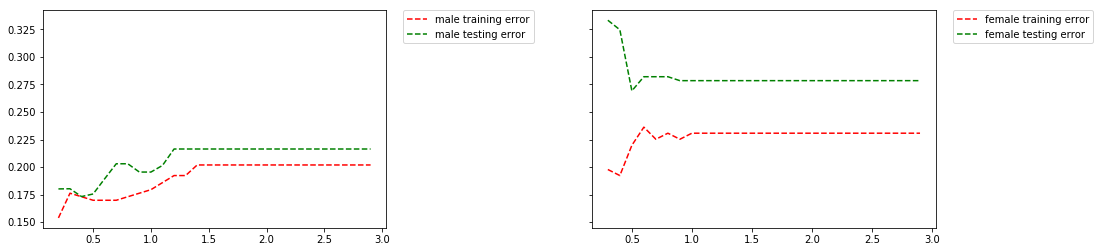

In [899]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 4), sharey=True)
ax1.plot(radius_list_male, MES_train_male, 'r--', label="male training error")
ax1.plot(radius_list_male, MES_test_male, 'g--', label="male testing error")
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.plot(radius_list_female, MES_train_female, 'r--', label="female training error")
ax2.plot(radius_list_female, MES_test_female, 'g--', label="female testing error")
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.subplots_adjust(wspace=0.6)
plt.show()

__Explanation:__
The plots above demonstrated that for both male and female, training set MES are higher than testing set MES. For female testing MES data, there is approximately concave shape of the testing MES, it decreases at first, then after reaching its minimum value, it increases a little and gradually become constant after r=1. Likewise, female training MES shows an overall convex curve, it increases at first and then decreases to a constant level. For male MES in training and testing data, both of them demostrates the fluctuating increasing curve till reach a constant maximized MES.  
For female training and testing MES, at first, when r is very small, the predication has low bias and high variance. For training set, it can help reach high MES, on the contrary, for testing set, because the model has high varaince, when r is low, the MES for testing data is high. With the increase of r, the trade off between bias and variance balanced out where testing error has lowest MES. The result of male training and testing MES is due to randomness.
For female loess , I would choose a bandwidth (r) of approximately0.5, because the error on the validation set is smallest. For male loess, I would choose a bandwidth (r) of approximately 0.5, because the error on the validation set is smallest.The results are different from the regression above.

### 3(d) $k$-NN

Try the above classification exercise, but using $k$-NN. Plot the error rate on the training and test sets, and plot these across $k$. How does the training error curve differ from the training error curve, and why? From this plot, using the "validation set approach" for choosing hyperparameters, what $k$ is appropriate? How does the error compare with loess? Which would you choose, loess or $k$-NN?

In [900]:
def knn_run_on_k(training_X, training_Y, testing_X, testing_Y, k):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(training_X, training_Y)
    train_predict = neigh.predict(training_X)
    test_predict = neigh.predict(testing_X)
    # calculete MES
    MES_train = mean_squared_error(training_Y, train_predict)
    MES_test = mean_squared_error(testing_Y, test_predict)
    return MES_train, MES_test

def knn_var_k(k_list, train_data, train_label, test_data, test_label):
    MES_train = []
    MES_test = []
    for i in k_list:
        MES_train_, MES_test_ = knn_run_on_k(train_data, train_label, test_data, test_label, i)
        MES_train.append(MES_train_)
        MES_test.append(MES_test_)
    return MES_train, MES_test

In [901]:
k_list = np.arange(1, 17)
MES_train_male, MES_test_male = knn_var_k(k_list, male_train, male_train_label, male_test, male_test_label)
MES_train_female, MES_test_female = knn_var_k(k_list, female_train, female_train_label, female_test, female_test_label)

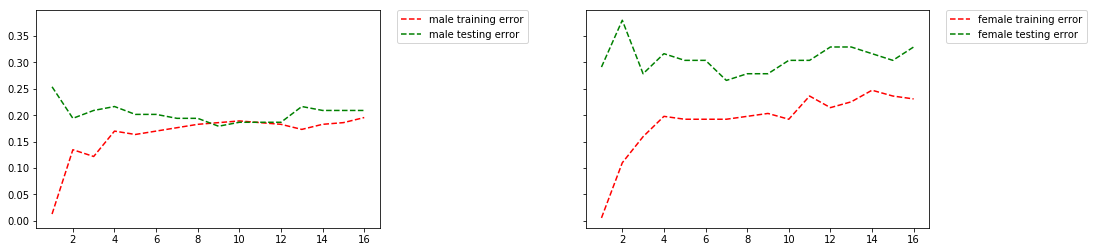

In [902]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 4), sharey=True)
ax1.plot(k_list, MES_train_male, 'r--', label="male training error")
ax1.plot(k_list, MES_test_male, 'g--', label="male testing error")
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.plot(k_list, MES_train_female, 'r--', label="female training error")
ax2.plot(k_list, MES_test_female, 'g--', label="female testing error")
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.subplots_adjust(wspace=0.6)
plt.show()

__Explanation:__
The plots above demonstrated that for both male and female, training set MES are higher than testing set MES. While there is a concave shape of the testing MES, training MES shows a convex curve with the increase of the bandwidth. At first, when r is very small, the predication has low bias and high variance. For training set, it can help reach high MES, on the contrary, for testing set, because the model has high varaince, when r is low, the MES for testing data is high. With the increase of r, the trade off between bias and variance balanced out where testing error has lowest MES. 
For female KNN, I would choose a k of approximately 7, because the error on the validation set is smallest. For male KNN, I would choose a k of approximately 9, because the error on the validation set is smallest.
Compared with loess, KNN has higher optimum MES given the dataset provided, therefore, I prefer loess.

## Exercise 4: Concepts (10%)

### 4(a) Missing Prediction

It's possible that loess won't predict anything for a certain observation on the test set. In what situation will this happen, and why? Could this also be the case for $k$-NN?

__Explanation:__
It is possible that loess won't predict anything for a certain obeservation on the test set when r is small and there is no available data within the bandwidth. When there is no avaible reference data in the bandwidth, loess cannot find any value to assign. This cannot be the case for $k$-NN as it looks for shortest distance with pairs of data, as long as k is less than the total data amount minus one, it is impossible for $k$-NN to predict NA.

### 4(b) Fundamental tradeoff

How do the bandwidth and $k$ hyperparameters in loess and $k$-NN influence the bias/variance tradeoff? Use two brief sentences.

__Explanation:__ When the bandwidth in loess and $k$ hyperparameters in $k$-NN increases, the bias increases while the varaince decreases; on the contrary, when the bandwidth in loess and $k$ hyperparameters in decreases, the bias decreases while the variance increases.